In [255]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np

In [257]:
file_path = r"C:\Users\acer\Downloads\Housing.csv"
df = pd.read_csv(file_path)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [261]:
num_cols = list(df.select_dtypes(include=['int64']).columns)
cat_cols = list(df.select_dtypes(include=['object']).columns)

In [263]:
print('Numeric columns',num_cols)
print('Categorical columns',cat_cols)

Numeric columns ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [265]:
#Chech for the contents in the categorical columns
for cat in cat_cols:
    print(cat, df[cat].unique())

mainroad ['yes' 'no']
guestroom ['no' 'yes']
basement ['no' 'yes']
hotwaterheating ['no' 'yes']
airconditioning ['yes' 'no']
prefarea ['yes' 'no']
furnishingstatus ['furnished' 'semi-furnished' 'unfurnished']


In [267]:
binary_cols = cat_cols[:-1] #lets filter out the columns which should be binary encoded
print(binary_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [269]:
"""Binary Encoding the binary features"""
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [271]:
df.head() # check the status of our binary encoding(we're good to go)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [273]:
"""One-hot encode the furnishing_status"""
df_encoded= pd.get_dummies(df,columns=['furnishingstatus'],drop_first = False).astype(int) #preserving all 3 furnished statuses

In [275]:
df_encoded.info() #encoding is done and dataset is almost clear now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int32
 1   area                             545 non-null    int32
 2   bedrooms                         545 non-null    int32
 3   bathrooms                        545 non-null    int32
 4   stories                          545 non-null    int32
 5   mainroad                         545 non-null    int32
 6   guestroom                        545 non-null    int32
 7   basement                         545 non-null    int32
 8   hotwaterheating                  545 non-null    int32
 9   airconditioning                  545 non-null    int32
 10  parking                          545 non-null    int32
 11  prefarea                         545 non-null    int32
 12  furnishingstatus_furnished       545 non-null    i

In [277]:
df_encoded.head() #good to go

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [279]:
X = df_encoded.drop(columns = ['price'])
y = df_encoded['price']
scalables = ['area','bedrooms','stories']

In [287]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 ,random_state =42)
scaler = StandardScaler()
#lets scale the scalable columns
X_train[scalables]= scaler.fit_transform(X_train[scalables])
X_test[scalables]= scaler.fit_transform(X_test[scalables])


In [289]:
model = RandomForestRegressor(random_state =42) #initialize the model but with the random state(with the good old 42 value :))
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

RMSE: 1416106.61
R²: 0.603


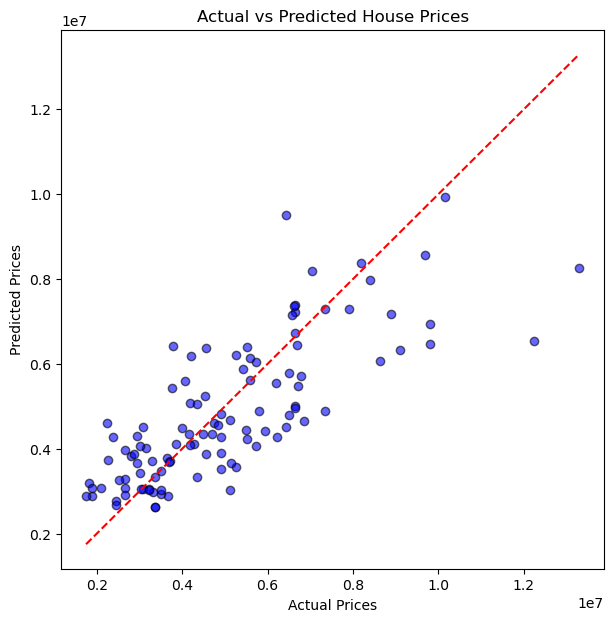

In [291]:

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()
